#### Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import matplotlib.ticker as ticker
plt.style.use('dark_background')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/2023-world-population-by-country/countries-table.csv
/kaggle/input/2023-world-population-by-country/countries-table.json


#### Dataset Reading

In [2]:
df = pd.read_csv('/kaggle/input/2023-world-population-by-country/countries-table.csv')

In [3]:
df

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,1,3287590.00,2973190.00,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,2,9706961.00,9424702.90,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,3,9372610.00,9147420.00,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,4,1904569.00,1877519.00,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,5,881912.00,770880.00,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,Montserrat,230,102.00,102.00,MS,MSR,NaN,-0.0009,NaN,43.0000,111.3700,500,11452,5138,4938,4390,4386,4301,3781
230,Falkland Islands,231,12173.00,12173.00,FK,FLK,NaN,0.0029,NaN,0.3114,0.8066,238,2240,3080,3187,3780,3791,3869,3779
231,Niue,232,261.00,261.00,NU,NIU,0.0000,0.0005,NaN,7.4138,19.2017,570,3637,2074,1812,1934,1935,1948,2096
232,Tokelau,233,12.00,10.00,TK,TKL,NaN,0.0118,NaN,189.3000,490.2870,772,1647,1666,1367,1871,1893,2046,2430


In [4]:
df.shape

(234, 19)

In [5]:
df.columns

Index(['country', 'rank', 'area', 'landAreaKm', 'cca2', 'cca3', 'netChange',
       'growthRate', 'worldPercentage', 'density', 'densityMi', 'place',
       'pop1980', 'pop2000', 'pop2010', 'pop2022', 'pop2023', 'pop2030',
       'pop2050'],
      dtype='object')

In [6]:
df.head()

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
0,India,1,3287590.0,2973190.0,IN,IND,0.4184,0.0081,0.1785,480.5033,1244.5036,356,696828385,1059633675,1240613620,1417173173,1428627663,1514994080,1670490596
1,China,2,9706961.0,9424702.9,CN,CHN,-0.0113,-0.0002,0.1781,151.2696,391.7884,156,982372466,1264099069,1348191368,1425887337,1425671352,1415605906,1312636325
2,United States,3,9372610.0,9147420.0,US,USA,0.0581,0.0050,0.0425,37.1686,96.2666,840,223140018,282398554,311182845,338289857,339996563,352162301,375391963
3,Indonesia,4,1904569.0,1877519.0,ID,IDN,0.0727,0.0074,0.0347,147.8196,382.8528,360,148177096,214072421,244016173,275501339,277534122,292150100,317225213
4,Pakistan,5,881912.0,770880.0,PK,PAK,0.1495,0.0198,0.0300,311.9625,807.9829,586,80624057,154369924,194454498,235824862,240485658,274029836,367808468


In [7]:
df.tail()

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
229,Montserrat,230,102.00,102.00,MS,MSR,NaN,-0.0009,NaN,43.0000,111.3700,500,11452,5138,4938,4390,4386,4301,3781
230,Falkland Islands,231,12173.00,12173.00,FK,FLK,NaN,0.0029,NaN,0.3114,0.8066,238,2240,3080,3187,3780,3791,3869,3779
231,Niue,232,261.00,261.00,NU,NIU,0.0,0.0005,NaN,7.4138,19.2017,570,3637,2074,1812,1934,1935,1948,2096
232,Tokelau,233,12.00,10.00,TK,TKL,NaN,0.0118,NaN,189.3000,490.2870,772,1647,1666,1367,1871,1893,2046,2430
233,Vatican City,234,0.44,0.44,VA,VAT,NaN,0.0157,NaN,1177.2727,3049.1364,336,733,651,596,510,518,561,731


In [8]:
df.sample(5)

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
99,Austria,100,83871.0,82520.0,AT,AUT,0.0006,0.0022,0.0011,108.5671,281.1889,40,7547561,8010428,8362829,8939617,8958960,9054576,8924190
57,Mali,58,1240192.0,1220190.0,ML,MLI,0.0225,0.0310,0.0029,19.0902,49.4437,466,7372581,11239101,15529181,22593590,23293698,28712294,47439802
59,Syria,60,185180.0,183630.0,SY,SYR,0.0359,0.0498,0.0029,126.4881,327.6042,760,8898954,16307654,22337563,22125249,23227014,29824735,38306374
8,Russia,9,17098242.0,16376870.0,RU,RUS,-0.0158,-0.0019,0.0180,8.8200,22.8439,643,138257420,146844839,143242599,144713314,144444359,141432741,133133035
199,United States Virgin Islands,200,347.0,347.0,VI,VIR,0.0000,-0.0072,0.0000,284.5821,737.0677,850,96640,108185,106142,99465,98750,93419,77519


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          234 non-null    object 
 1   rank             234 non-null    int64  
 2   area             234 non-null    float64
 3   landAreaKm       234 non-null    float64
 4   cca2             233 non-null    object 
 5   cca3             234 non-null    object 
 6   netChange        226 non-null    float64
 7   growthRate       234 non-null    float64
 8   worldPercentage  228 non-null    float64
 9   density          234 non-null    float64
 10  densityMi        234 non-null    float64
 11  place            234 non-null    int64  
 12  pop1980          234 non-null    int64  
 13  pop2000          234 non-null    int64  
 14  pop2010          234 non-null    int64  
 15  pop2022          234 non-null    int64  
 16  pop2023          234 non-null    int64  
 17  pop2030         

In [10]:
df.describe()

,rank,area,landAreaKm,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
count,234.000000,2.340000e+02,2.340000e+02,226.000000,234.000000,228.000000,234.000000,234.000000,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02
mean,117.500000,5.814500e+05,5.571123e+05,0.010306,0.009737,0.004407,451.288182,1168.836388,439.085470,1.898462e+07,2.626947e+07,2.984524e+07,3.407441e+07,3.437442e+07,3.651461e+07,4.148628e+07
std,67.694165,1.761841e+06,1.689972e+06,0.034774,0.012350,0.017375,1979.362419,5126.548664,253.295484,8.178519e+07,1.116982e+08,1.242185e+08,1.367664e+08,1.373864e+08,1.417827e+08,1.481676e+08
min,1.000000,4.400000e-01,4.400000e-01,-0.028600,-0.074500,0.000000,0.138000,0.357400,4.000000,7.330000e+02,6.510000e+02,5.960000e+02,5.100000e+02,5.180000e+02,5.610000e+02,7.310000e+02
25%,59.250000,2.650000e+03,2.625875e+03,0.000000,0.002325,0.000100,39.747650,102.946450,223.000000,2.296142e+05,3.272420e+05,3.931490e+05,4.197385e+05,4.225982e+05,4.561490e+05,5.466058e+05
50%,117.500000,8.119950e+04,7.568925e+04,0.000900,0.008200,0.000750,97.481000,252.475800,439.000000,3.141146e+06,4.292907e+06,4.942770e+06,5.559944e+06,5.643895e+06,6.178231e+06,6.352397e+06
75%,175.750000,4.304258e+05,4.047876e+05,0.008000,0.016850,0.002925,242.928650,629.185350,659.750000,9.826054e+06,1.576230e+07,1.915957e+07,2.247650e+07,2.324537e+07,2.616311e+07,3.568614e+07
max,234.000000,1.709824e+07,1.637687e+07,0.418400,0.049800,0.178500,21402.705200,55433.006400,894.000000,9.823725e+08,1.264099e+09,1.348191e+09,1.425887e+09,1.428628e+09,1.514994e+09,1.670491e+09


#### Data Cleaning and Exploring Fields

In [11]:
df.duplicated().sum()

0

Good to see that dataset is not having any duplicate values

In [12]:
df.isna().sum()

country            0
rank               0
area               0
landAreaKm         0
cca2               1
cca3               0
netChange          8
growthRate         0
worldPercentage    6
density            0
densityMi          0
place              0
pop1980            0
pop2000            0
pop2010            0
pop2022            0
pop2023            0
pop2030            0
pop2050            0
dtype: int64

In [13]:
net_mean = round(df['netChange'].mean(),4)
net_mean

0.0103

In [14]:
df['netChange'].fillna(net_mean, inplace=True)

In [15]:
world_mean = round(df['worldPercentage'].mean(),4)
world_mean

0.0044

In [16]:
df['worldPercentage'].fillna(world_mean, inplace=True)

In [17]:
df[df['cca2'].isna()]

,country,rank,area,landAreaKm,cca2,cca3,netChange,growthRate,worldPercentage,density,densityMi,place,pop1980,pop2000,pop2010,pop2022,pop2023,pop2030,pop2050
144,Namibia,145,825615.0,823290.0,NaN,NAM,0.0012,0.0145,0.0003,3.1631,8.1925,516,975994,1819141,2099271,2567012,2604172,2910056,3779918


In [18]:
df['cca2'].fillna('NA', inplace=True)

In [19]:
df.isna().sum()

country            0
rank               0
area               0
landAreaKm         0
cca2               0
cca3               0
netChange          0
growthRate         0
worldPercentage    0
density            0
densityMi          0
place              0
pop1980            0
pop2000            0
pop2010            0
pop2022            0
pop2023            0
pop2030            0
pop2050            0
dtype: int64

We have treated all null values

In [20]:
df['worldPercentage'] = df['worldPercentage'] * 100

##### Data looks clean now. So let's start analysis😊

### Analysis

#### Top 10 Biggest Countries by Area

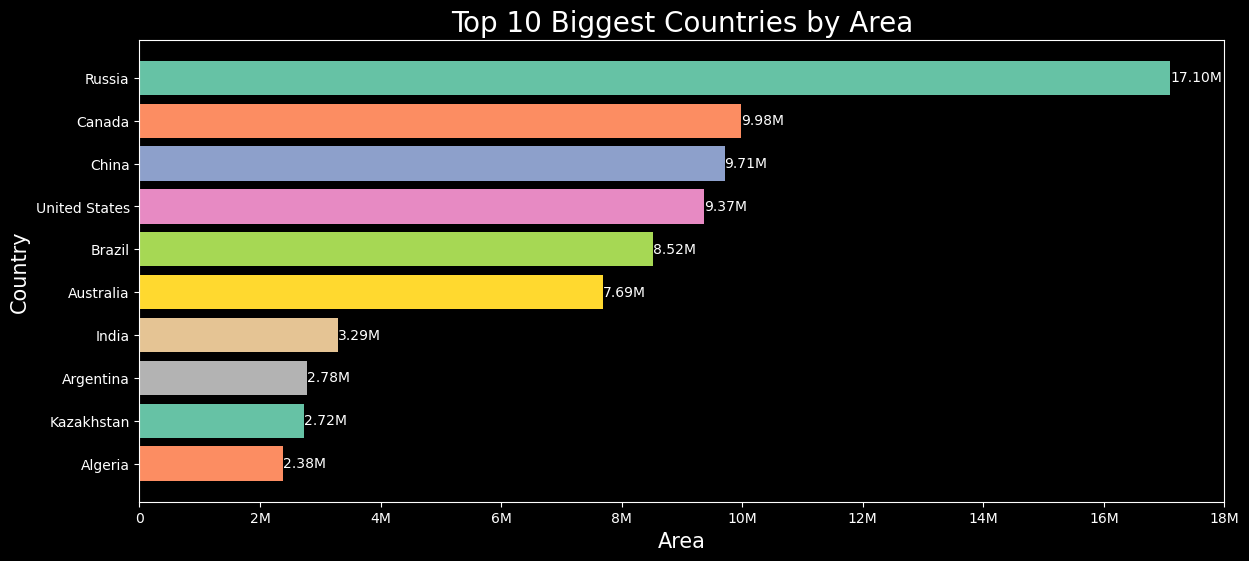

In [21]:
top_10_countries = df.sort_values(by='area', ascending=False).head(10)

plt.figure(figsize=(14, 6))
palette = sns.color_palette("Set2")
ax = plt.barh(top_10_countries['country'], top_10_countries['area'],color=palette)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.title('Top 10 Biggest Countries by Area', fontsize=20)
plt.gca().invert_yaxis()
plt.xticks([0, 2e6, 4e6, 6e6, 8e6, 10e6, 12e6, 14e6, 16e6, 18e6], ['0', '2M', '4M', '6M', '8M', '10M', '12M', '14M', '16M', '18M'])

for bar in ax:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width/1e6:.2f}M', va='center')

Russia is the largest country by area in the world

#### Top 10 Smallest Countries by Area

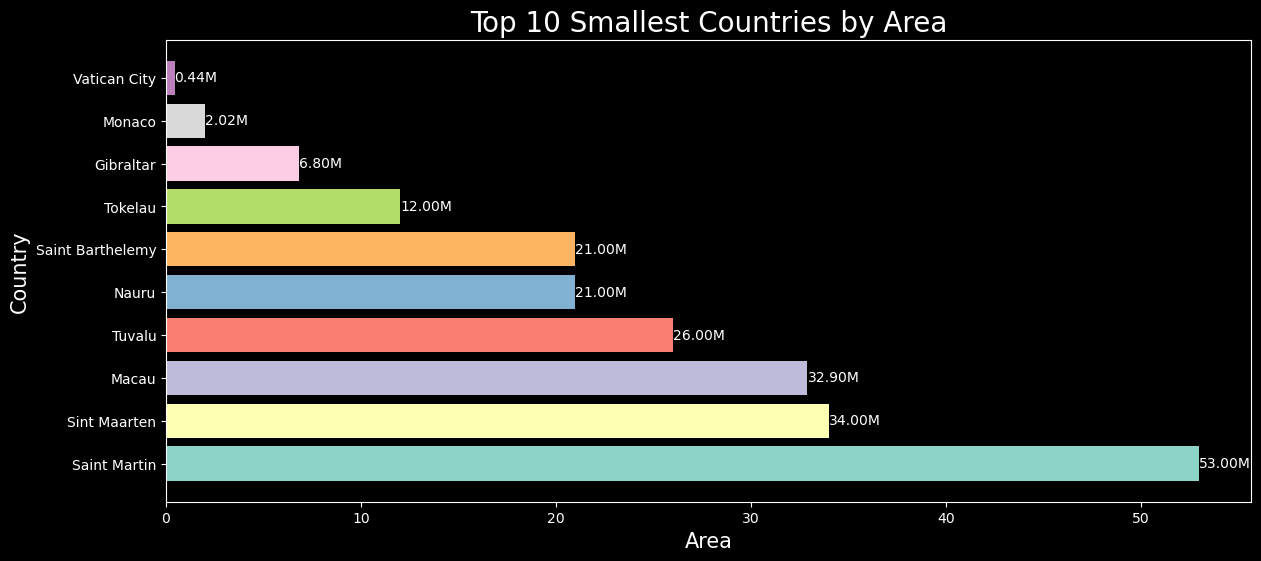

In [22]:
bottom_10_countries = df.sort_values(by='area', ascending=False).tail(10)

plt.figure(figsize=(14, 6))
palette = sns.color_palette("Set3")
ax = plt.barh(bottom_10_countries['country'], bottom_10_countries['area'],color=palette)
plt.xlabel('Area', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.title('Top 10 Smallest Countries by Area', fontsize=20)


for bar in ax:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}M', va='center')

Vatican City is the smallest country by area in the world

#### Top 10 Countries by Growth Rate

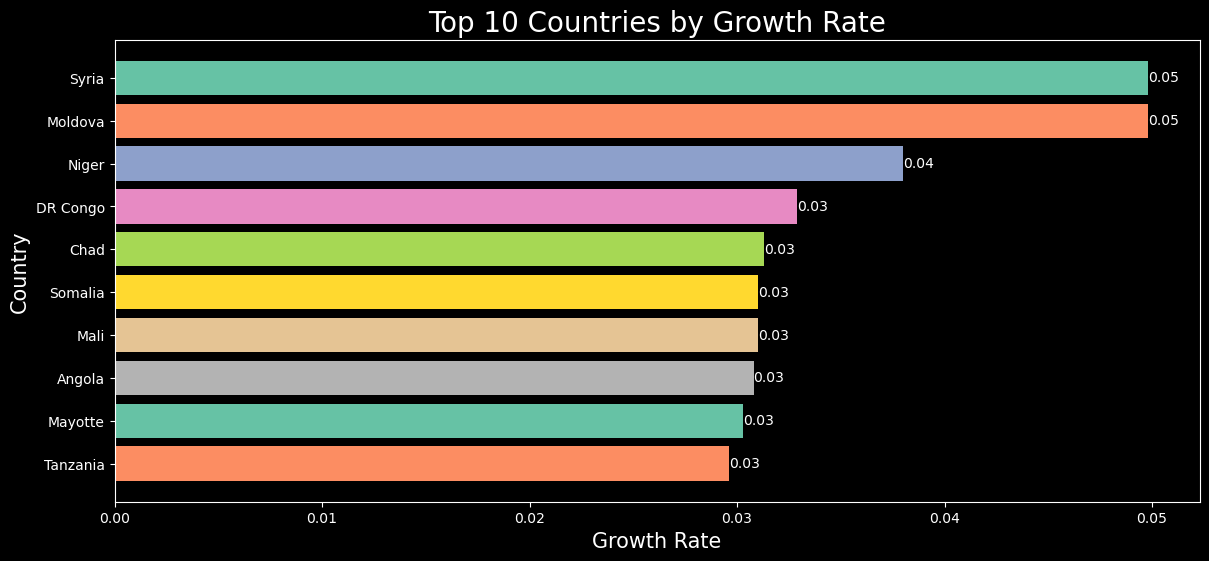

In [23]:
top_10_countries_growth_rate = df.sort_values(by='growthRate', ascending=False).head(10)

plt.figure(figsize=(14, 6))
palette = sns.color_palette("Set2")
ax = plt.barh(top_10_countries_growth_rate['country'], top_10_countries_growth_rate['growthRate'],color=palette)
plt.xlabel('Growth Rate', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.title('Top 10 Countries by Growth Rate', fontsize=20)
plt.gca().invert_yaxis()

for bar in ax:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')

Syria and Moldova have the highest Growth rate in the world

#### Bottom 10 Countries by Growth Rate

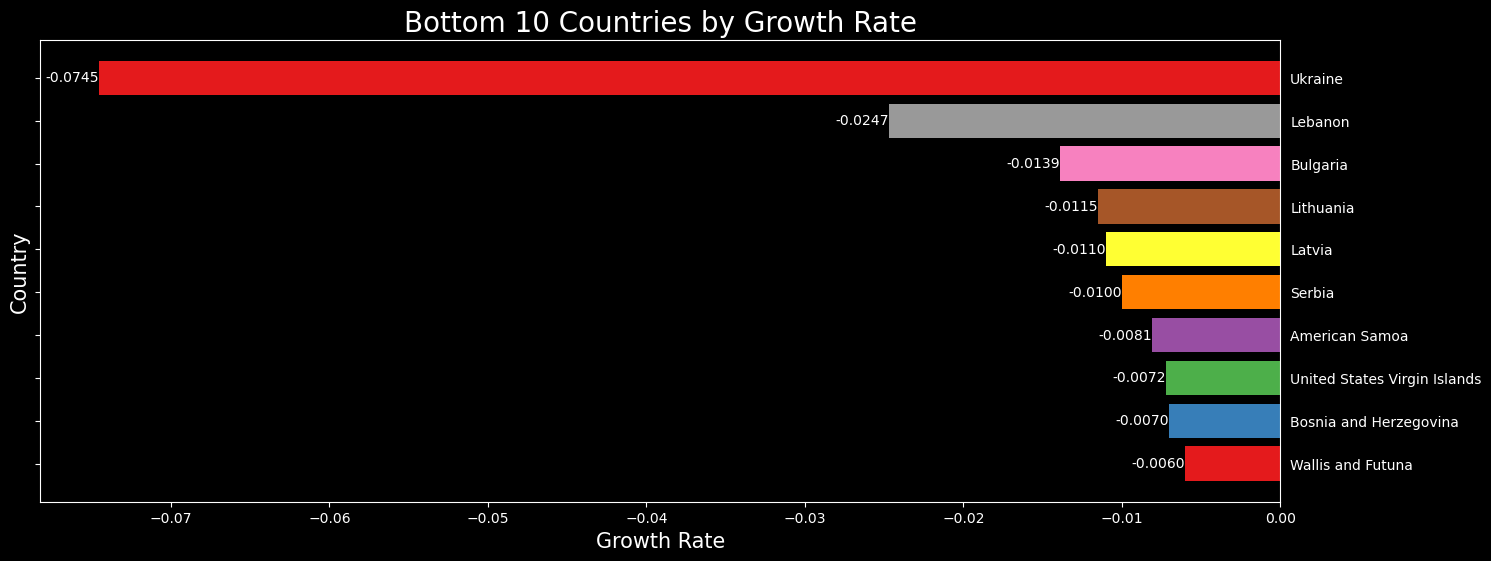

In [24]:
bottom_10_countries_growth_rate = df.sort_values(by='growthRate', ascending=False).tail(10)

plt.figure(figsize=(16, 6))
palette = sns.color_palette("Set1")
ax = plt.barh(bottom_10_countries_growth_rate['country'], bottom_10_countries_growth_rate['growthRate'],color=palette)
plt.xlabel('Growth Rate', fontsize=15)
plt.ylabel('Country', fontsize=15)
plt.title('Bottom 10 Countries by Growth Rate', fontsize=20)
plt.tick_params(axis='y', labelleft=False, labelright=True)

for bar in ax:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    plt.text(width - 0.00001, y_pos, f'{width:.4f}', va='center', ha='right')

Ukraine has the worst Growth rate in the world

#### Top 10 countires by Population %

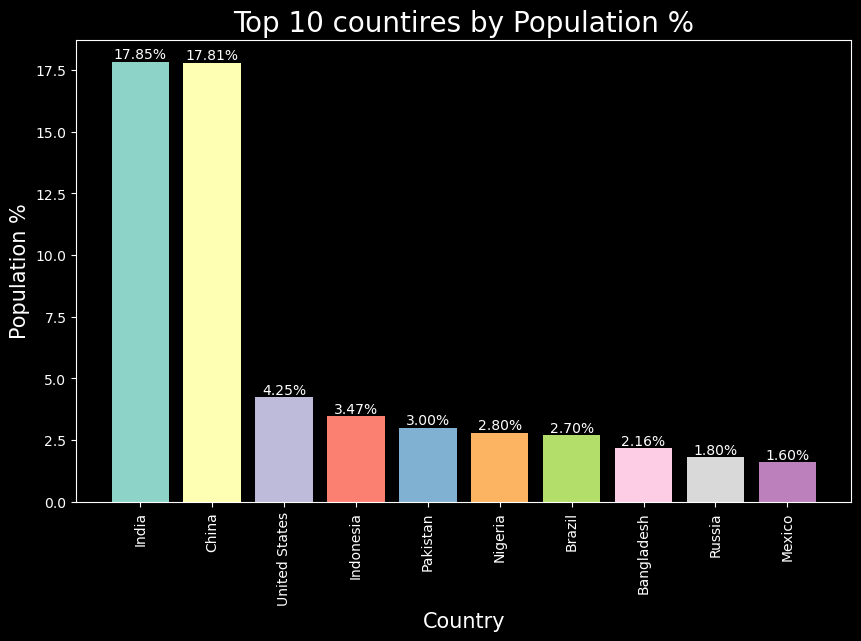

In [25]:
top_10_countries = df.sort_values(by='worldPercentage', ascending=False).head(10)

plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set3")
ax = plt.bar(top_10_countries['country'], top_10_countries['worldPercentage'],color=palette)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Population %', fontsize=15)
plt.title('Top 10 countires by Population %', fontsize=20)
plt.xticks(rotation=90)

for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}%', ha='center', va='bottom')

India is the most populated country in the world but China is also very close to India in terms of the population

#### Top 10 countires by Density

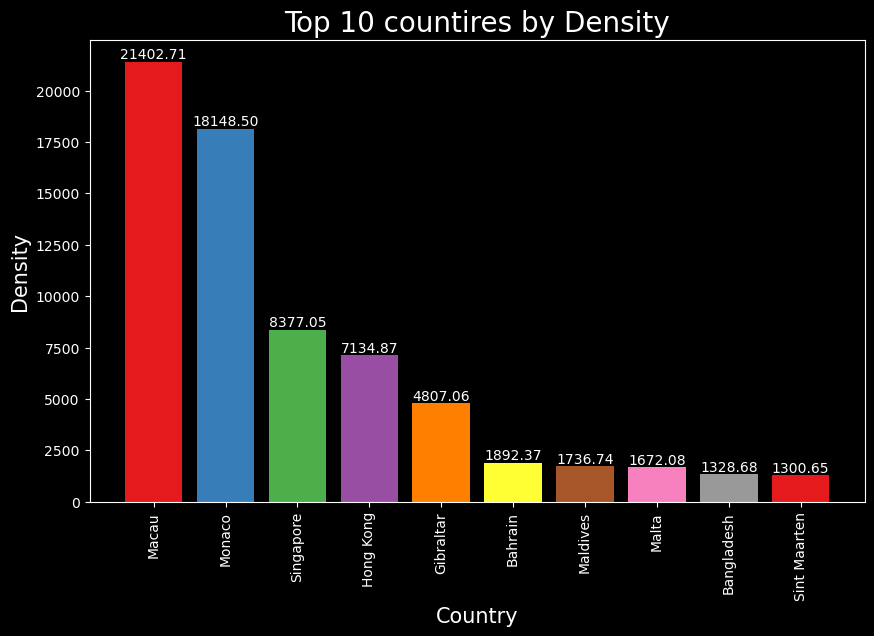

In [26]:
top_10_countries = df.sort_values(by='density', ascending=False).head(10)

plt.figure(figsize=(10, 6))
palette = sns.color_palette("Set1")
ax = plt.bar(top_10_countries['country'], top_10_countries['density'],color=palette)
plt.ylabel('Density', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.title('Top 10 countires by Density', fontsize=20)
plt.xticks(rotation=90)

for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

Macau is the most densely populated country in the world

#### Bottom 10 countires by Density

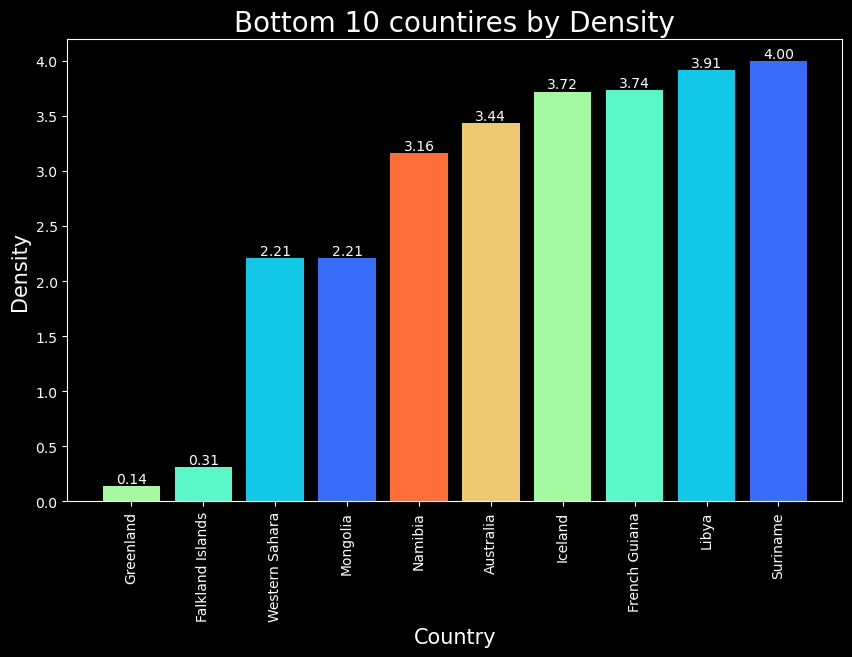

In [27]:
bottom_10_countries = df.sort_values(by='density', ascending=False).tail(10)

plt.figure(figsize=(10, 6))
palette = sns.color_palette("rainbow")
ax = plt.bar(bottom_10_countries['country'], bottom_10_countries['density'],color=palette)
plt.ylabel('Density', fontsize=15)
plt.xlabel('Country', fontsize=15)
plt.title('Bottom 10 countires by Density', fontsize=20)
plt.xticks(rotation=90)
plt.gca().invert_xaxis()

for bar in ax:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

Greenland is the least densely populated country in the world

In [28]:
def top_10_countries_by_years(year):
    top_10_countries = df.sort_values(by=year, ascending=False).head(10)

    plt.figure(figsize=(16, 6))
    palette = sns.color_palette("Set1")
    ax = plt.barh(top_10_countries['country'], top_10_countries[year],color=palette)
    plt.xlabel('Population', fontsize=15)
    plt.ylabel('Country', fontsize=15)
    plt.title(f'Top 10 Countries by population in {year[-4:]}', fontsize=20)
    plt.gca().invert_yaxis()
    tick_values = [x * 100e6 for x in range(0, int(max(top_10_countries[year]) / 100e6) + 1)]
    tick_labels = [f'{x/1e6:.0f}M' for x in tick_values]
    plt.xticks(tick_values, tick_labels)

    for bar in ax:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width/1e6:.2f}M', va='center')

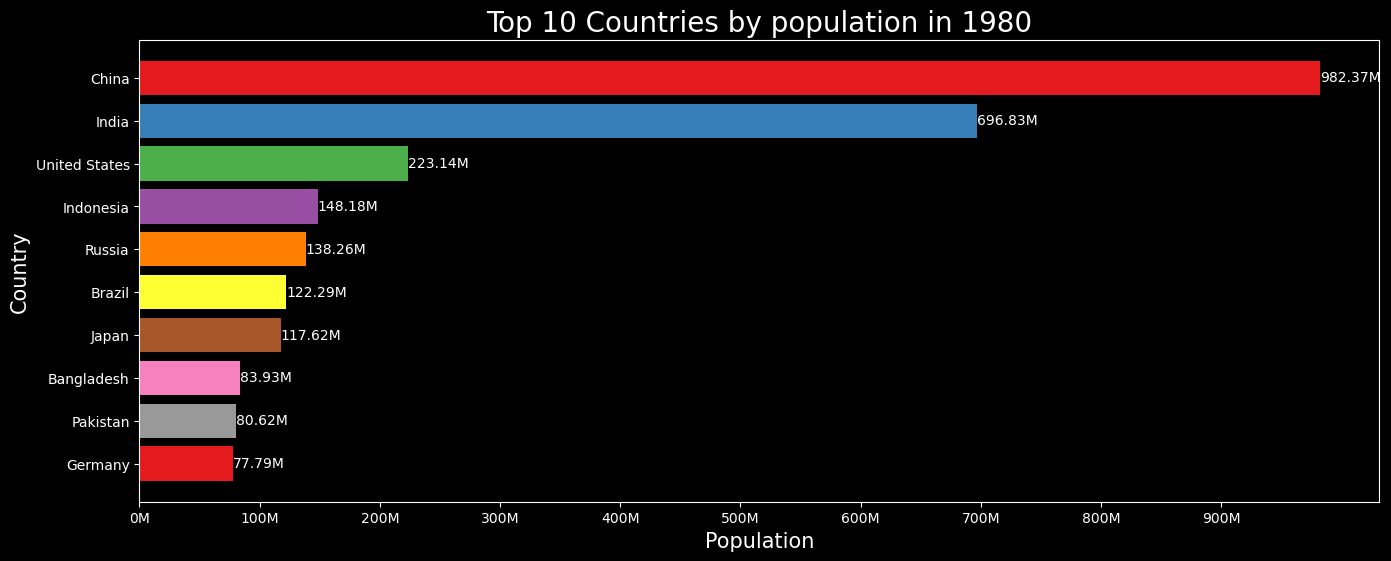

In [29]:
top_10_countries_by_years('pop1980')

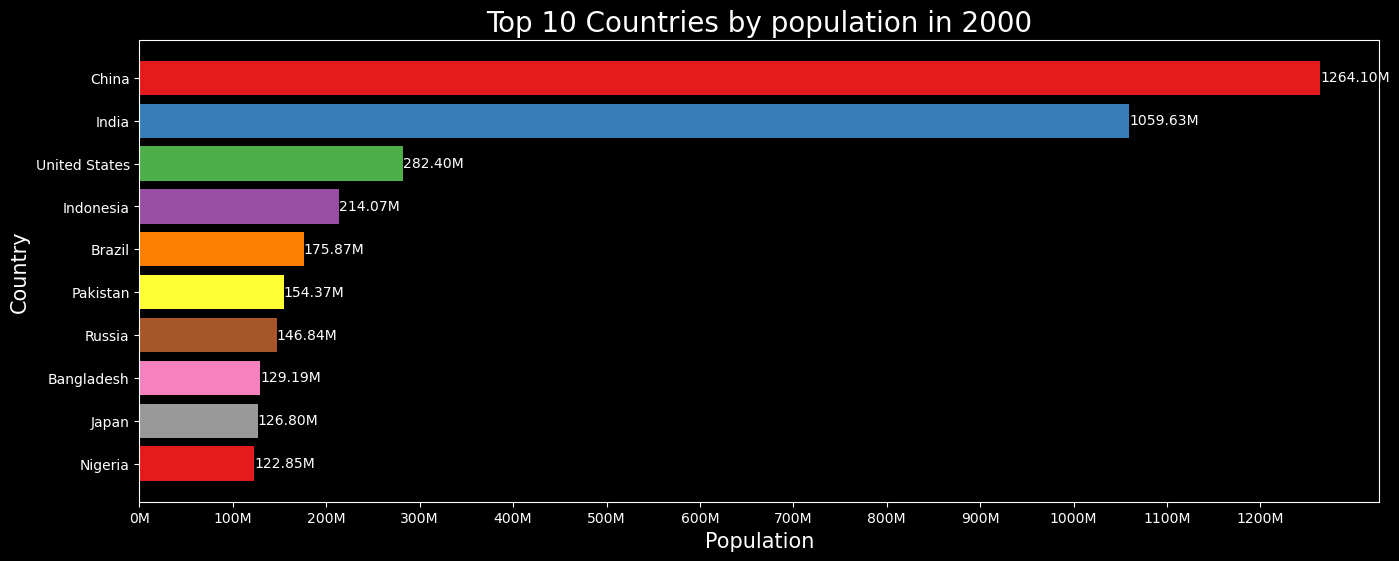

In [30]:
top_10_countries_by_years('pop2000')

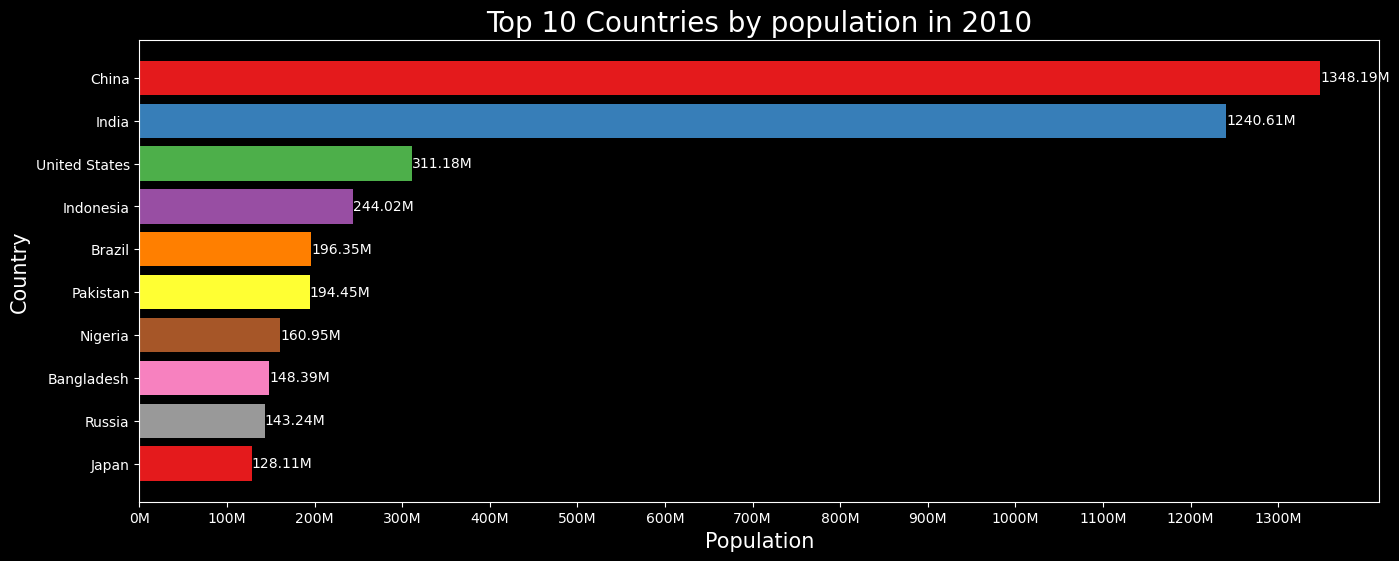

In [31]:
top_10_countries_by_years('pop2010')

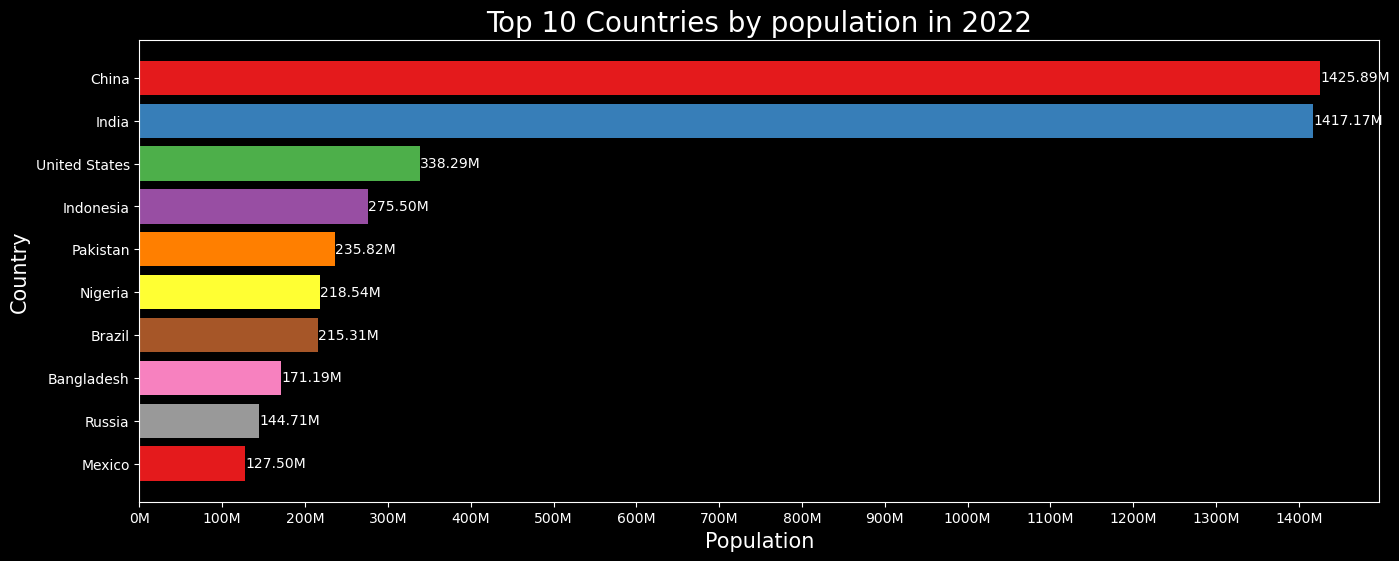

In [32]:
top_10_countries_by_years('pop2022')

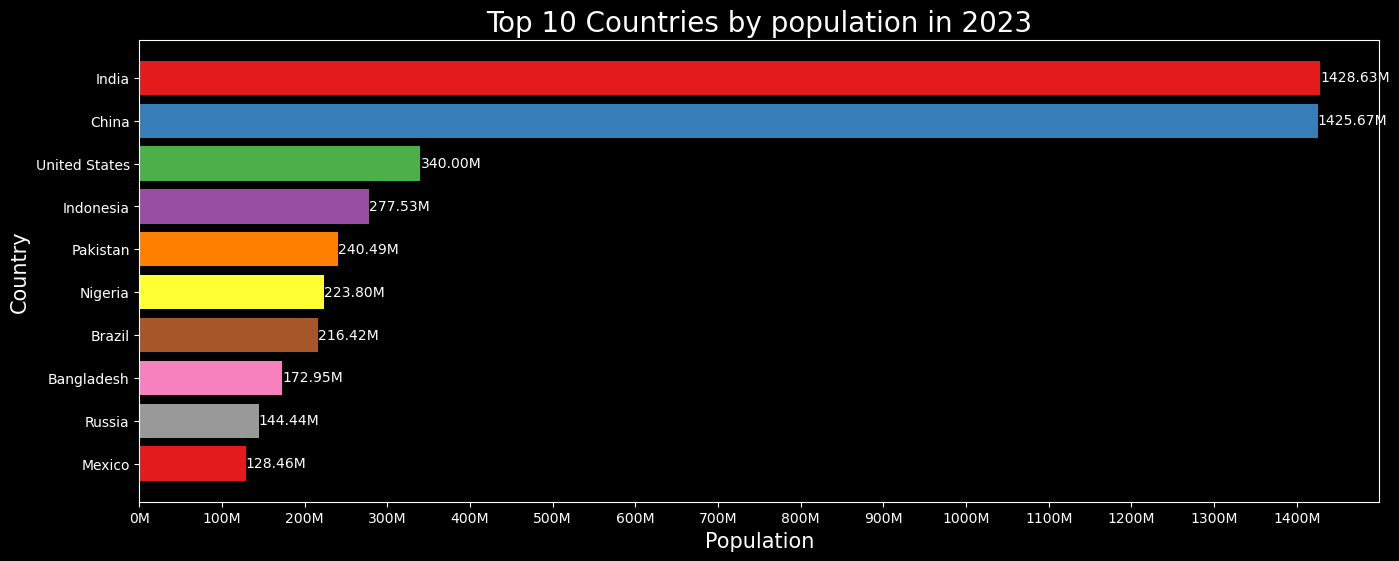

In [33]:
top_10_countries_by_years('pop2023')

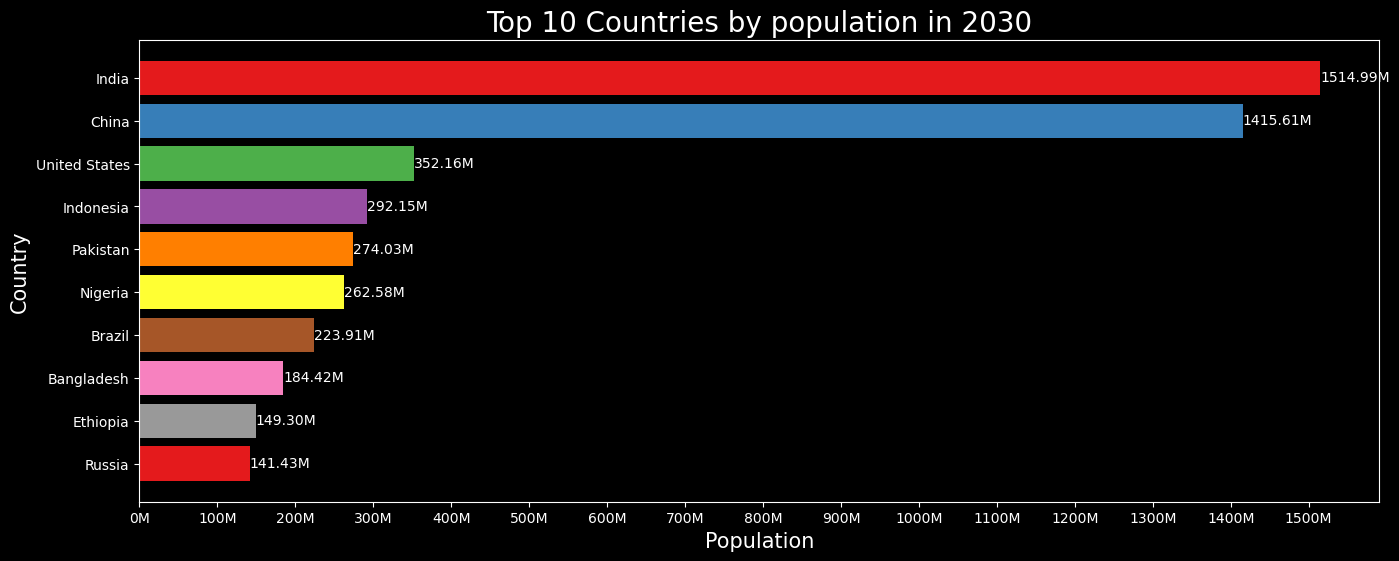

In [34]:
top_10_countries_by_years('pop2030')

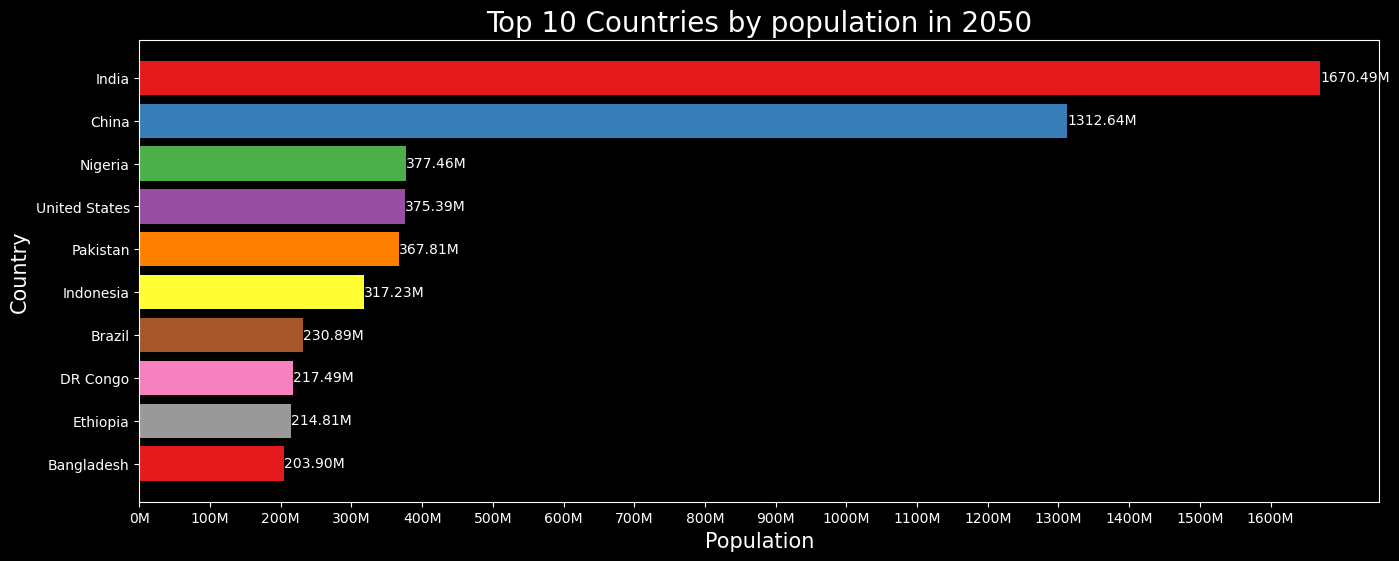

In [35]:
top_10_countries_by_years('pop2050')

There was a decent gap between India's and China's population but it become almost equal by 2022 and in 2023 India became the highest populated country and by 2050 India will create good gap to China in terms of population

#### Population Trends: World Economic Countries (1980-2050)

In [36]:
labels = ['1980', '2000', '2010', '2022', '2023', '2030', '2050']
countries_to_include = ['India', 'China', 'United States', 'Japan', 'Germany']
filtered_df = df[df['country'].isin(countries_to_include)]

data_by_country = {country: [] for country in countries_to_include}

for label in labels:
    for country in countries_to_include:
        population = filtered_df.loc[filtered_df['country'] == country, f'pop{label}'].values
        data_by_country[country].extend(population)

for country, data in data_by_country.items():
    print(f'{country}: {data}')

India: [696828385, 1059633675, 1240613620, 1417173173, 1428627663, 1514994080, 1670490596]
China: [982372466, 1264099069, 1348191368, 1425887337, 1425671352, 1415605906, 1312636325]
United States: [223140018, 282398554, 311182845, 338289857, 339996563, 352162301, 375391963]
Japan: [117624196, 126803861, 128105431, 123951692, 123294513, 118514802, 103784357]
Germany: [77786703, 81551677, 81325090, 83369843, 83294633, 82762675, 78932228]


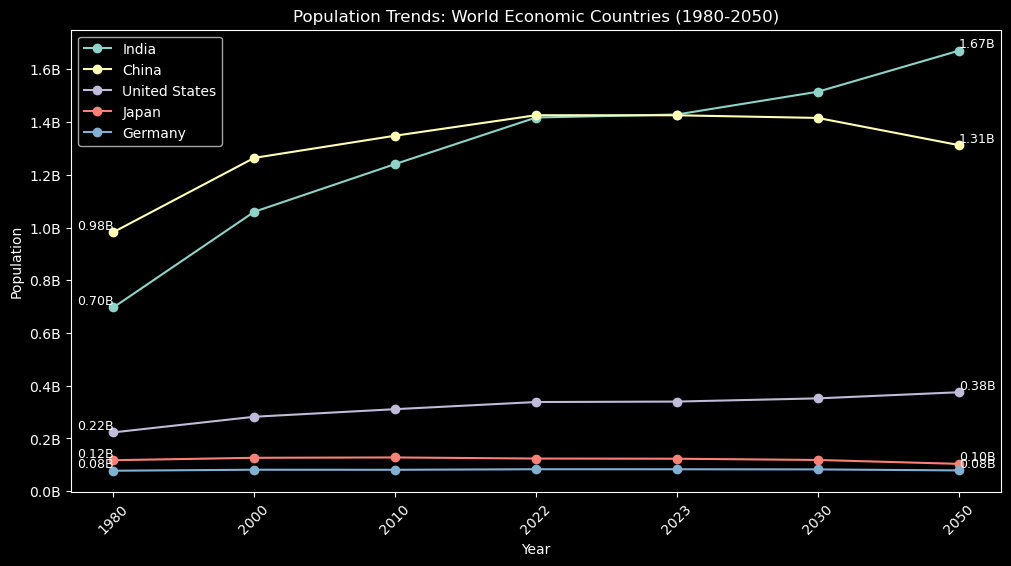

In [37]:
plt.figure(figsize=(12, 6))

for country, data in data_by_country.items():
    plt.plot(labels, data, label=country, marker='o')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Trends: World Economic Countries (1980-2050)')
plt.legend()
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1e9:.1f}B'))
for country, data in data_by_country.items():
    plt.text(labels[0], data[0], f'{data[0]/1e9:.2f}B', ha='right', va='bottom', fontsize=9)
    plt.text(labels[-1], data[-1], f'{data[-1]/1e9:.2f}B', ha='left', va='bottom', fontsize=9)

Out of the top 5 Economies, three nations, China, Japan are going to see decline in their population. India and America will see increase in their population. But America will be having a stable growth, whereas India is not going to yet another robust growth in population. However Germany has stable population

### Insights
* Russia being the largest country by area (17.1 million square kilometers) is consistent with its vast landmass.
* Vatican City being the smallest country by area (0.44 square kilometers) aligns with its extremely small size.
* Syria and Moldova having the highest growth rate in the world (0.0498) indicates significant population growth in these countries.
* Ukraine having the worst growth rate in the world (-0.0745) suggests a decline in population.
* India being the most populated country in the world and China being close in terms of population (17.8%) reflects the significant population of both countries.
* Macau having the most densely populated country (21,402.7 people per square kilometer) and Greenland having the least densely populated country (0.14 people per square kilometer) highlight population density differences.
* The convergence of India's and China's population by 2022 and India becoming the highest populated country by 2023 indicates a potential shift in global population dynamics.
* Out of the top 5 economies, China and Japan experiencing population decline, while India and the US seeing population growth, with the US having more stable growth and India showing a potentially robust growth pattern. Germany is projected to have a stable population.